# Recap: RNN

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

# Vanishing Gradient Problem

![vanishing](https://www.kdnuggets.com/wp-content/uploads/vanishing-gradient-problem-12.png)
Source: https://www.kdnuggets.com/2022/02/vanishing-gradient-problem.html

https://medium.com/@El_Fares_Anass/a-basic-explanation-how-the-gradient-descent-is-determined-during-back-propagation-864376f8f1a4

https://kharshit.github.io/blog/2019/01/04/the-gradient-problem-in-rnn

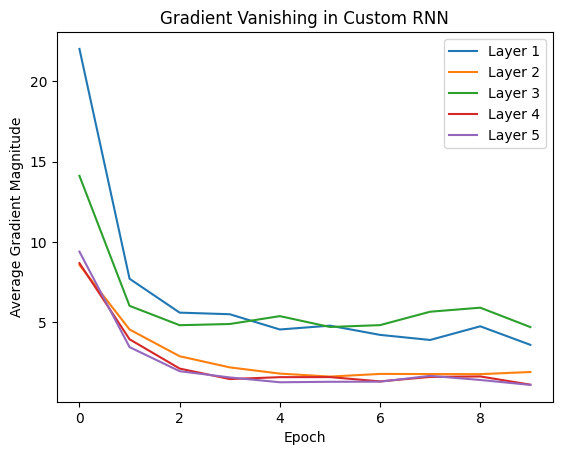

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate some toy data
X = np.random.randn(1000, 10, 1)  # 1000 sequences of length 10, each with 1 feature
y = np.random.randint(0, 2, size=(1000, 1))  # Binary classification labels, reshaped

# Define a custom RNN model
class CustomRNNModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomRNNModel, self).__init__()
        self.depth = depth
        self.rnn_layers = [tf.keras.layers.SimpleRNN(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.rnn_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom RNN model
units = 10
depth = 5
model_rnn = CustomRNNModel(units=units, depth=depth)

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_rnn)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_rnn.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom RNN')
plt.legend()
plt.show()


## GRU

![gru](https://miro.medium.com/v2/resize:fit:846/format:webp/1*i-yqUwAYTo2Mz-P1Ql6MbA.png)

https://medium.com/@anishnama20/understanding-gated-recurrent-unit-gru-in-deep-learning-2e54923f3e2

https://d2l.ai/chapter_recurrent-modern/gru.html

https://github.com/kaustubhhiware/LSTM-GRU-from-scratch/blob/master/module.py

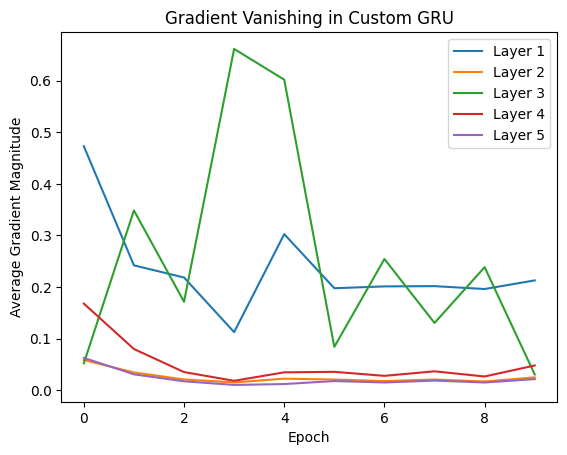

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define a custom GRU model
class CustomGRUModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomGRUModel, self).__init__()
        self.depth = depth
        self.gru_layers = [tf.keras.layers.GRU(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.gru_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom GRU model
units = 10
depth = 5
model_gru = CustomGRUModel(units=units, depth=depth)

# Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_gru)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_gru.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom GRU')
plt.legend()
plt.show()


## LSTM

![lstm](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*J5W8FrASMi93Z81NlAui4w.png)

https://d2l.ai/chapter_recurrent-modern/lstm.html

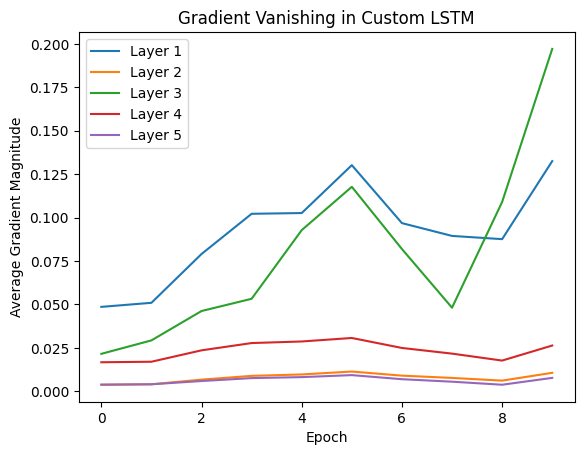

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define a custom LSTM model
class CustomLSTMModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomLSTMModel, self).__init__()
        self.depth = depth
        self.lstm_layers = [tf.keras.layers.LSTM(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.lstm_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom LSTM model
units = 10
depth = 5
model_lstm = CustomLSTMModel(units=units, depth=depth)

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_lstm)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_lstm.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom LSTM')
plt.legend()
plt.show()


## Comparison

In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

# Generate some toy data
X = np.random.randn(1000, 1000, 100)  # 1000 sequences of length 1000, each with 100 features
y = np.random.randint(0, 2, size=(1000,))  # Binary classification labels

# Define a simple RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1000, 100), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train the model
history_rnn = model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 2s 42ms/step - loss: 0.8264 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 1s 41ms/step - loss: 0.7726 - accuracy: 0.5250
Epoch 3/10
32/32 [==============================] - 1s 42ms/step - loss: 0.7351 - accuracy: 0.5460
Epoch 4/10
32/32 [==============================] - 1s 43ms/step - loss: 0.7043 - accuracy: 0.5780
Epoch 5/10
32/32 [==============================] - 1s 41ms/step - loss: 0.6817 - accuracy: 0.6070
Epoch 6/10
32/32 [==============================] - 1s 43ms/step - loss: 0.6619 - accuracy: 0.6260
Epoch 7/10
32/32 [==============================] - 1s 41ms/step - loss: 0.6443 - accuracy: 0.6440
Epoch 8/10
32/32 [==============================] - 1s 44ms/step - loss: 0.6292 - accuracy: 0.6670
Epoch 9/10
32/32 [==============================] - 1s 42ms/step - loss: 0.6156 - accuracy: 0.6840
Epoch 10/10
32/32 [==============================] - 1s 41ms/step - loss: 0.6026 - accuracy: 0.6920


In [32]:
from keras.layers import LSTM

# Define an LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1000, 100), return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 4s 89ms/step - loss: 0.7034 - accuracy: 0.5060
Epoch 2/10
32/32 [==============================] - 3s 90ms/step - loss: 0.6849 - accuracy: 0.5440
Epoch 3/10
32/32 [==============================] - 3s 90ms/step - loss: 0.6709 - accuracy: 0.5810
Epoch 4/10
32/32 [==============================] - 3s 93ms/step - loss: 0.6571 - accuracy: 0.6220
Epoch 5/10
32/32 [==============================] - 3s 92ms/step - loss: 0.6428 - accuracy: 0.6530
Epoch 6/10
32/32 [==============================] - 3s 88ms/step - loss: 0.6272 - accuracy: 0.6800
Epoch 7/10
32/32 [==============================] - 3s 91ms/step - loss: 0.6098 - accuracy: 0.7240
Epoch 8/10
32/32 [==============================] - 3s 92ms/step - loss: 0.5905 - accuracy: 0.7500
Epoch 9/10
32/32 [==============================] - 3s 95ms/step - loss: 0.5691 - accuracy: 0.7730
Epoch 10/10
32/32 [==============================] - 3s 92ms/step - loss: 0.5452 - accuracy: 0.8010


/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_7909/1943434190.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_7909/1943434190.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних


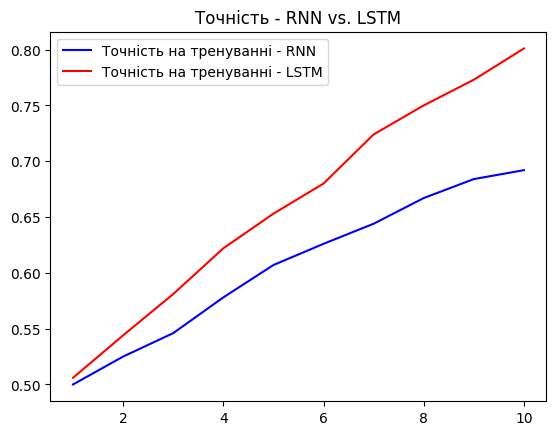

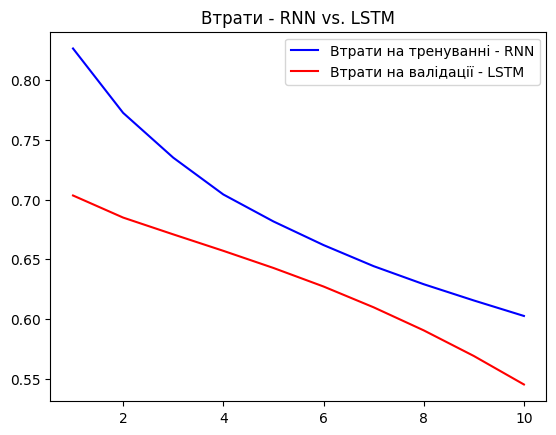

In [33]:
acc_rnn = history_rnn.history['accuracy']
loss_rnn = history_rnn.history['loss']

acc_lstm = history_lstm.history['accuracy']
loss_lstm = history_lstm.history['loss']


epochs = range(1, len(acc_rnn) + 1)

plt.plot(epochs, acc_rnn, 'b', label='Точність на тренуванні - RNN')  # Графік точності на тренувальних данних
plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
plt.title('Точність - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss_rnn, 'b', label='Втрати на тренуванні - RNN')  # Графік втрат на тренувальних данних
plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних
plt.title('Втрати - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# Usage

Epoch 1/5
196/196 - 90s - loss: 0.4269 - accuracy: 0.8020 - val_loss: 0.3319 - val_accuracy: 0.8563 - 90s/epoch - 461ms/step
Epoch 2/5
196/196 - 90s - loss: 0.2433 - accuracy: 0.9048 - val_loss: 0.3076 - val_accuracy: 0.8734 - 90s/epoch - 461ms/step
Epoch 3/5
196/196 - 93s - loss: 0.1897 - accuracy: 0.9294 - val_loss: 0.3323 - val_accuracy: 0.8706 - 93s/epoch - 474ms/step
Epoch 4/5
196/196 - 100s - loss: 0.1467 - accuracy: 0.9478 - val_loss: 0.4091 - val_accuracy: 0.8599 - 100s/epoch - 509ms/step
Epoch 5/5
196/196 - 101s - loss: 0.1248 - accuracy: 0.9547 - val_loss: 0.4079 - val_accuracy: 0.8616 - 101s/epoch - 515ms/step
Test Loss: 0.407894492149353, Test Accuracy: 0.8616399765014648


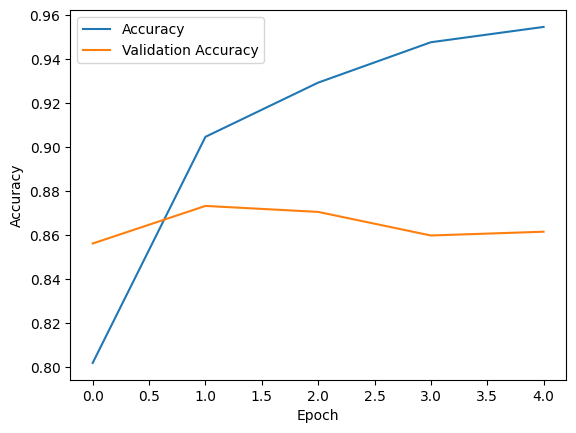

In [20]:
# from here: https://colab.research.google.com/drive/1R5VfJLZU0ZvYBRPAWBvLe6GSB3DReI55#scrollTo=W9LoZJdNpWLK

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
num_words = 10000  # Consider only the top 10,000 words
maxlen = 200  # Limit the maximum review length to 200 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Define the LSTM model
embedding_dim = 128
lstm_units = 64
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/5
196/196 - 20s - loss: 0.5877 - accuracy: 0.6802 - val_loss: 0.5103 - val_accuracy: 0.7506 - 20s/epoch - 102ms/step
Epoch 2/5
196/196 - 19s - loss: 0.3675 - accuracy: 0.8411 - val_loss: 0.3958 - val_accuracy: 0.8290 - 19s/epoch - 97ms/step
Epoch 3/5
196/196 - 19s - loss: 0.1768 - accuracy: 0.9342 - val_loss: 0.4240 - val_accuracy: 0.8385 - 19s/epoch - 95ms/step
Epoch 4/5
196/196 - 18s - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.5165 - val_accuracy: 0.8359 - 18s/epoch - 94ms/step
Epoch 5/5
196/196 - 18s - loss: 0.0296 - accuracy: 0.9919 - val_loss: 0.6564 - val_accuracy: 0.7925 - 18s/epoch - 94ms/step
Test Loss: 0.6564049124717712, Test Accuracy: 0.7925199866294861


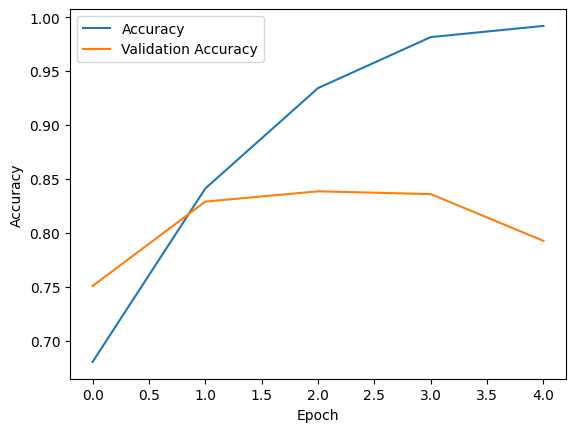

In [21]:
# RNN

model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    SimpleRNN(64),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}")

# Plot training history
plt.plot(history_rnn.history['accuracy'], label='Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Bidirectional RNN

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks @Variants of RNN

https://keras.io/api/layers/recurrent_layers/bidirectional/

Epoch 1/5
196/196 - 24s - loss: 0.6045 - accuracy: 0.6531 - val_loss: 0.4588 - val_accuracy: 0.7964 - 24s/epoch - 122ms/step
Epoch 2/5
196/196 - 27s - loss: 0.3997 - accuracy: 0.8222 - val_loss: 0.3761 - val_accuracy: 0.8403 - 27s/epoch - 138ms/step
Epoch 3/5
196/196 - 26s - loss: 0.2407 - accuracy: 0.9059 - val_loss: 0.4524 - val_accuracy: 0.8252 - 26s/epoch - 134ms/step
Epoch 4/5
196/196 - 27s - loss: 0.1105 - accuracy: 0.9624 - val_loss: 0.4896 - val_accuracy: 0.8200 - 27s/epoch - 138ms/step
Epoch 5/5
196/196 - 26s - loss: 0.0454 - accuracy: 0.9870 - val_loss: 0.5775 - val_accuracy: 0.8076 - 26s/epoch - 134ms/step
Test Loss: 0.5774865746498108, Test Accuracy: 0.8075600266456604


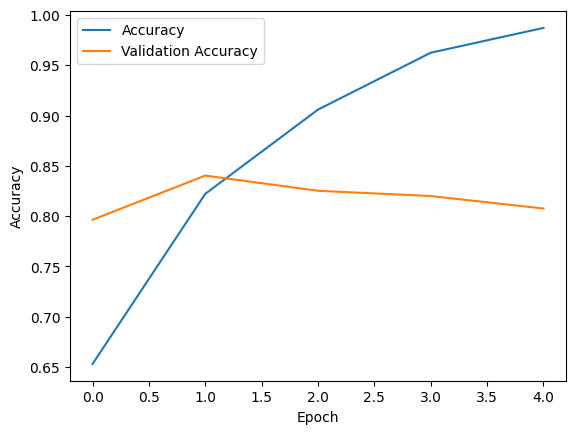

In [24]:
# RNN
from keras.layers import Bidirectional

model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    Bidirectional(SimpleRNN(64)),  # Bidirectional
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}")

# Plot training history
plt.plot(history_rnn.history['accuracy'], label='Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/5
196/196 - 141s - loss: 0.4408 - accuracy: 0.7878 - val_loss: 0.3180 - val_accuracy: 0.8690 - 141s/epoch - 722ms/step
Epoch 2/5
196/196 - 162s - loss: 0.2399 - accuracy: 0.9061 - val_loss: 0.3012 - val_accuracy: 0.8706 - 162s/epoch - 827ms/step
Epoch 3/5
196/196 - 164s - loss: 0.1905 - accuracy: 0.9292 - val_loss: 0.3553 - val_accuracy: 0.8678 - 164s/epoch - 835ms/step
Epoch 4/5
196/196 - 159s - loss: 0.1535 - accuracy: 0.9438 - val_loss: 0.3667 - val_accuracy: 0.8656 - 159s/epoch - 810ms/step
Epoch 5/5
196/196 - 168s - loss: 0.1214 - accuracy: 0.9570 - val_loss: 0.3924 - val_accuracy: 0.8642 - 168s/epoch - 857ms/step
Test Loss: 0.39242446422576904, Test Accuracy: 0.8641600012779236


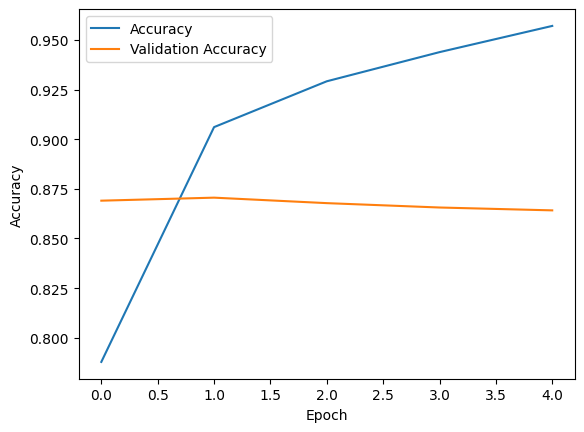

In [26]:
# LSTM

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)),  # Bidirectional LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()